In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [5]:
data_set = 'Irish_2010'
attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')

In [3]:
# K-means clustering

for num_clusters in range(1, 11):
    labels = []
    for month in tqdm(range(12)):

        X = []
        for i in range(len(attr)):
            id = attr['ID'][i]
            df = pd.read_csv('../data/' + data_set + '_profiles_interval/' + str(id) + '.csv', header = None).values
            X.append(np.hstack((df[month*2], df[month*2+1])))
        X = np.array(X)
        X = (X - np.min(X))/(np.max(X) - np.min(X))

        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True, 
                        verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='full').fit(X)
        labels.append(kmeans.labels_)

    pd.DataFrame(np.array(labels).T).to_csv('../result/' + data_set + '/cluster/interval/kmeans/n_clusters_' + str(num_clusters) + '.csv', header=None, index=False)

100%|██████████| 12/12 [00:24<00:00,  2.03s/it]


In [24]:
# Hierarchical clustering

dist = 'hausdorff'
for num_clusters in range(1, 11):
    labels = []
    for month in tqdm(range(12)):

        mat = pd.read_csv('../result/' + data_set + '/cluster/interval/hierarchical/' + dist + '/mat_month_' + str(month+1) + '.csv', header=None).values
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', memory=None, connectivity=None, 
                                               compute_full_tree='auto', linkage='average', pooling_func='deprecated', distance_threshold=None).fit(mat)
        labels.append(hierarchical.labels_)

    pd.DataFrame(np.array(labels).T).to_csv('../result/' + data_set + '/cluster/interval/hierarchical/' + dist + '/n_clusters_' + str(num_clusters) + '.csv', header=None, index=False)

100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


## Plot

In [22]:
# Plot preparation
import matplotlib.pyplot as plt
%matplotlib inline

data_set = 'London_2013'
method = 'hierarchical/hausdorff'
# method = 'kmeans'
num_clusters = 10
month = 1

attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/cluster/interval/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)

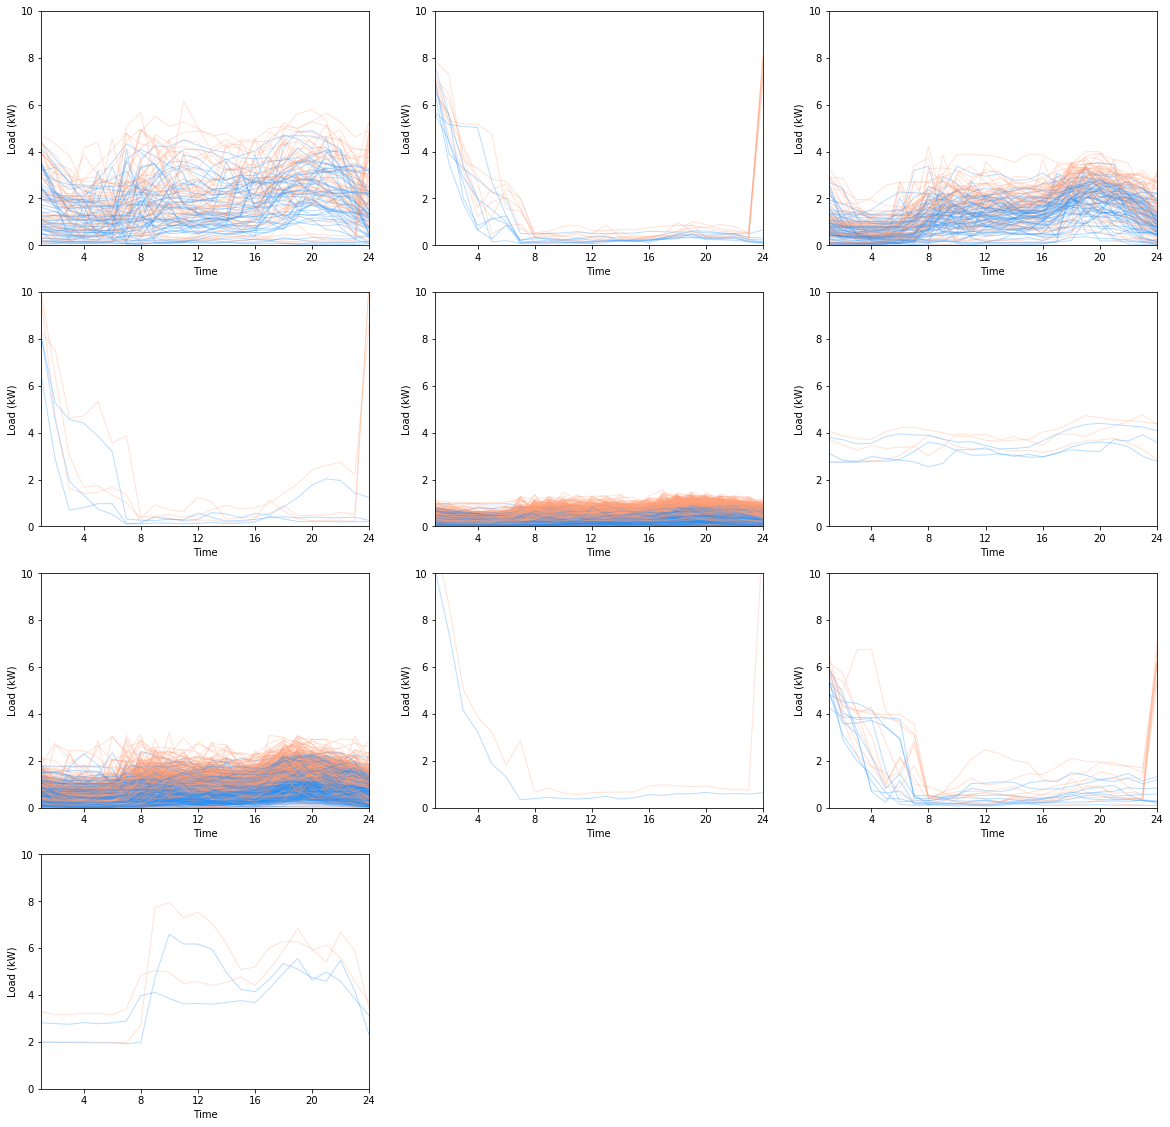

In [23]:
# Plot
plt.figure(figsize=(20,25))
for k in range(num_clusters):
    plt.subplot(5, 3, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles_interval/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
            plt.plot(list(range(1, 25)), df[month*2-2], alpha=0.3, color='dodgerblue', linewidth=1)
            plt.plot(list(range(1, 25)), df[month*2-1], alpha=0.3, color='lightsalmon', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)